In [1]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import os
import pandas as pd
from ultralytics import YOLO
import numpy as np
import shutil

# 내가 만든 모델의 단점

In [2]:
forders=os.listdir(r"dataset\train")
data={}
for forder in forders:
    data[forder]=[len(os.listdir(r"dataset\train\{}".format(forder)))]
df=pd.DataFrame(data,index=['사진의 갯수']).T
df

,사진의 갯수
가을 웜톤,2511
겨울 쿨톤,2511
봄 웜톤,2511
여름 쿨톤,2511


In [22]:
from ultralytics import YOLO
model=YOLO("warmcoolmodel.pt")
result=model.predict(r"newData\1_0_0_20161219140623097.jpg")
model.names[result[0].probs.top1]


image 1/1 d:\GitHub\WarmCoolYolo\newData\1_0_0_20161219140623097.jpg: 224x224 fall 0.49, summer 0.46, spring 0.04, winter 0.01, 27.9ms
Speed: 3.6ms preprocess, 27.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


'fall'

In [26]:
import os
import shutil
from ultralytics import YOLO
model=YOLO("warmcoolmodel.pt")
imgs=list(filter(lambda x: "." in x,os.listdir("newData")))
c=0
for img in imgs:
    c+=1
    path="newData/{}".format(img)
    try:
        result=model.predict(path)
        name=model.names[result[0].probs.top1]
        shutil.move(path,f"newData/{name}")
    except:
        pass
    print(f"{c/len(imgs)*100}% 완료")



image 1/1 d:\GitHub\WarmCoolYolo\newData\44_1_4_20170116235150272.png: 224x224 fall 0.68, spring 0.19, summer 0.08, winter 0.05, 23.8ms
Speed: 3.6ms preprocess, 23.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
50.0% 완료

image 1/1 d:\GitHub\WarmCoolYolo\newData\55_0_0_20170116232725357.jpg: 224x224 summer 0.36, spring 0.30, fall 0.30, winter 0.04, 27.9ms
Speed: 5.4ms preprocess, 27.9ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
100.0% 완료


In [9]:

lenght=0
for i in os.listdir("01.원천데이터"):
        lenght+=len(os.listdir(f"01.원천데이터/{i}"))
lenght

191

In [10]:
model=YOLO("warmcoolmodel.pt")

for i in os.listdir("01.원천데이터"):
    for j in(os.listdir(f"01.원천데이터/{i}")): 
        result=model.predict(f"01.원천데이터/{i}/{j}")
        name=model.names[result[0].probs.top1]
        shutil.move(f"01.원천데이터/{i}/{j}",f"newData/{name}")



image 1/1 d:\GitHub\WarmCoolYolo\01.\0001\0001_1992_04_00000007_F.png: 224x224 summer 0.62, fall 0.22, spring 0.14, winter 0.02, 21.3ms
Speed: 52.2ms preprocess, 21.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 d:\GitHub\WarmCoolYolo\01.\0001\0001_1992_04_00000008_F.png: 224x224 summer 0.54, spring 0.19, winter 0.18, fall 0.09, 15.4ms
Speed: 50.4ms preprocess, 15.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 d:\GitHub\WarmCoolYolo\01.\0001\0001_1992_04_00000013_F.png: 224x224 fall 0.37, summer 0.29, winter 0.22, spring 0.13, 17.2ms
Speed: 62.2ms preprocess, 17.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 d:\GitHub\WarmCoolYolo\01.\0001\0001_1992_05_00000015_F.png: 224x224 summer 0.61, winter 0.18, fall 0.12, spring 0.09, 22.5ms
Speed: 27.3ms preprocess, 22.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 d:\GitHub\WarmCoolYolo\01.\0001\0001_1992_08_0000

In [18]:
model=YOLO("warmcoolmodel.pt")
data={}
for i in model.names.values():
    data[i]=[len(os.listdir(f"dataset/train/{i}"))]
df=pd.DataFrame(data,index=['사진의 갯수']).T
df

,사진의 갯수
fall,2511
spring,2511
summer,2512
winter,2511


In [17]:
model=YOLO("warmcoolmodel.pt")
data={}
for i in model.names.values():
    data[i]=[len(os.listdir(f"newData/{i}"))]
df=pd.DataFrame(data,index=['사진의 갯수']).T
df

,사진의 갯수
fall,0
spring,0
summer,0
winter,0


In [16]:
for i in model.names.values():
    for j in os.listdir(f"newData/{i}"):
        shutil.move(f"newData/{i}/{j}",f"dataset/train/{i}")

In [23]:
model.names

{0: 'fall', 1: 'spring', 2: 'summer', 3: 'winter'}

10545

<BarContainer object of 4 artists>

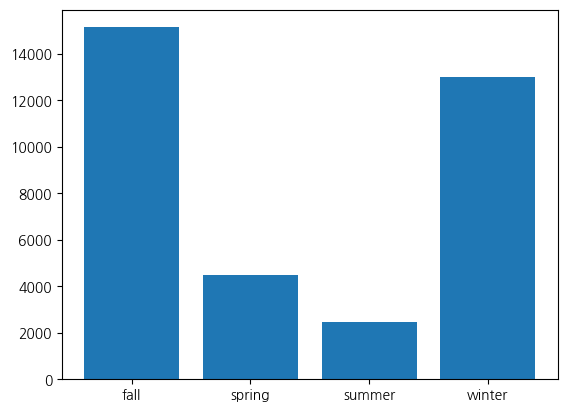

In [28]:
plt.bar(df.index,df['사진의 갯수'])